In [1]:
#!pip install tensorflow

In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

2024-03-18 03:10:23.346158: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 03:10:23.346266: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 03:10:23.514000: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
sample = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# Preprocessing the data
  * Impute missing values
      - numeric: median
      - categorical: most_frequent
  * Scaling
       - numeric: min max scaler
       - categorical: one hot encoder

## 1. Fill Na values 

### a. Check for missing value in train and test data

In [6]:
train_na = train.isnull().sum().reset_index()
train_na.rename(columns = {'index': 'column', 0: 'na_count'}, inplace = True)
train_missing_cols = train_na[train_na['na_count']> 0].column
train_missing_cols

3      LotFrontage
6            Alley
25      MasVnrType
26      MasVnrArea
30        BsmtQual
31        BsmtCond
32    BsmtExposure
33    BsmtFinType1
35    BsmtFinType2
42      Electrical
57     FireplaceQu
58      GarageType
59     GarageYrBlt
60    GarageFinish
63      GarageQual
64      GarageCond
72          PoolQC
73           Fence
74     MiscFeature
Name: column, dtype: object

In [7]:
test_na = test.isnull().sum().reset_index()
test_na.rename(columns = {'index': 'column', 0: 'na_count'}, inplace = True)
test_missing_cols = test_na[test_na['na_count']> 0].column
test_missing_cols

2         MSZoning
3      LotFrontage
6            Alley
9        Utilities
23     Exterior1st
24     Exterior2nd
25      MasVnrType
26      MasVnrArea
30        BsmtQual
31        BsmtCond
32    BsmtExposure
33    BsmtFinType1
34      BsmtFinSF1
35    BsmtFinType2
36      BsmtFinSF2
37       BsmtUnfSF
38     TotalBsmtSF
47    BsmtFullBath
48    BsmtHalfBath
53     KitchenQual
55      Functional
57     FireplaceQu
58      GarageType
59     GarageYrBlt
60    GarageFinish
61      GarageCars
62      GarageArea
63      GarageQual
64      GarageCond
72          PoolQC
73           Fence
74     MiscFeature
78        SaleType
Name: column, dtype: object

=> Both train and test set has the same columns that contain missing values 

## b.Pipeline(impute, transfom) 

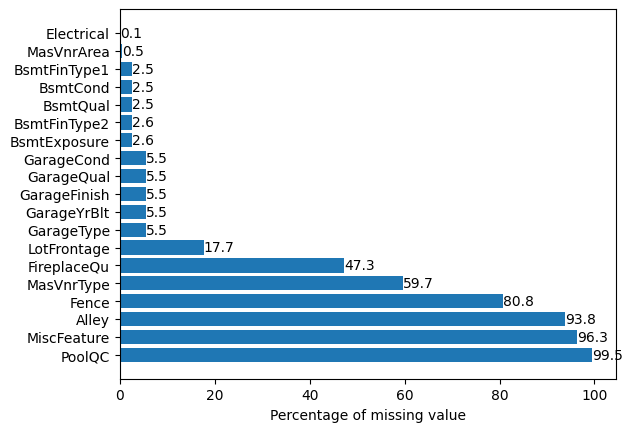

In [8]:
train_na = train_na[train_na['na_count'] > 0].sort_values(by = 'na_count', ascending = False)
train_na['percentage'] = np.round(train_na['na_count'] / len(train) *100, 1)
barh = plt.barh(train_na['column'], train_na['percentage'])
plt.bar_label(barh)
plt.xlabel('Percentage of missing value')
plt.show()

> Our last 4 features contain mostly Nas. So I decieded to remove those columns 

In [9]:
# Decide to drop Fence, Alley, MiscFeature, PoolQC because most of them are NAs
drop_columns = ['Fence', 'Alley', 'MiscFeature', 'PoolQC']
train.drop(columns = drop_columns, inplace = True)
test.drop(columns = drop_columns, inplace = True)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [13]:
# Find categorical columns and numerical columns 
cat_cols = train.select_dtypes(include = 'object').columns 
num_cols = train.select_dtypes(exclude = 'object').columns
cat_cols.shape, num_cols.shape

((39,), (38,))

In [14]:
missing_cols = train_missing_cols
missing_cat_cols = missing_cols[missing_cols.isin(cat_cols)]
missing_num_cols = missing_cols[missing_cols.isin(num_cols)]
missing_cat_cols.shape, missing_num_cols.shape

((12,), (3,))

> ### Let's see the distribution of our missing features 

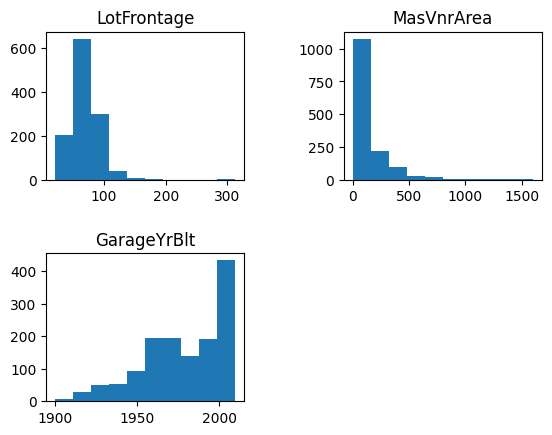

In [15]:
figs, axes = plt.subplots(2,2)
for i,col in enumerate(missing_num_cols):
    ax = axes[i//2,i%2]
    ax.hist(train[col])
    ax.set_title(col)
    
figs.delaxes(axes[1][1]) # delete the empty sbplot
figs.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

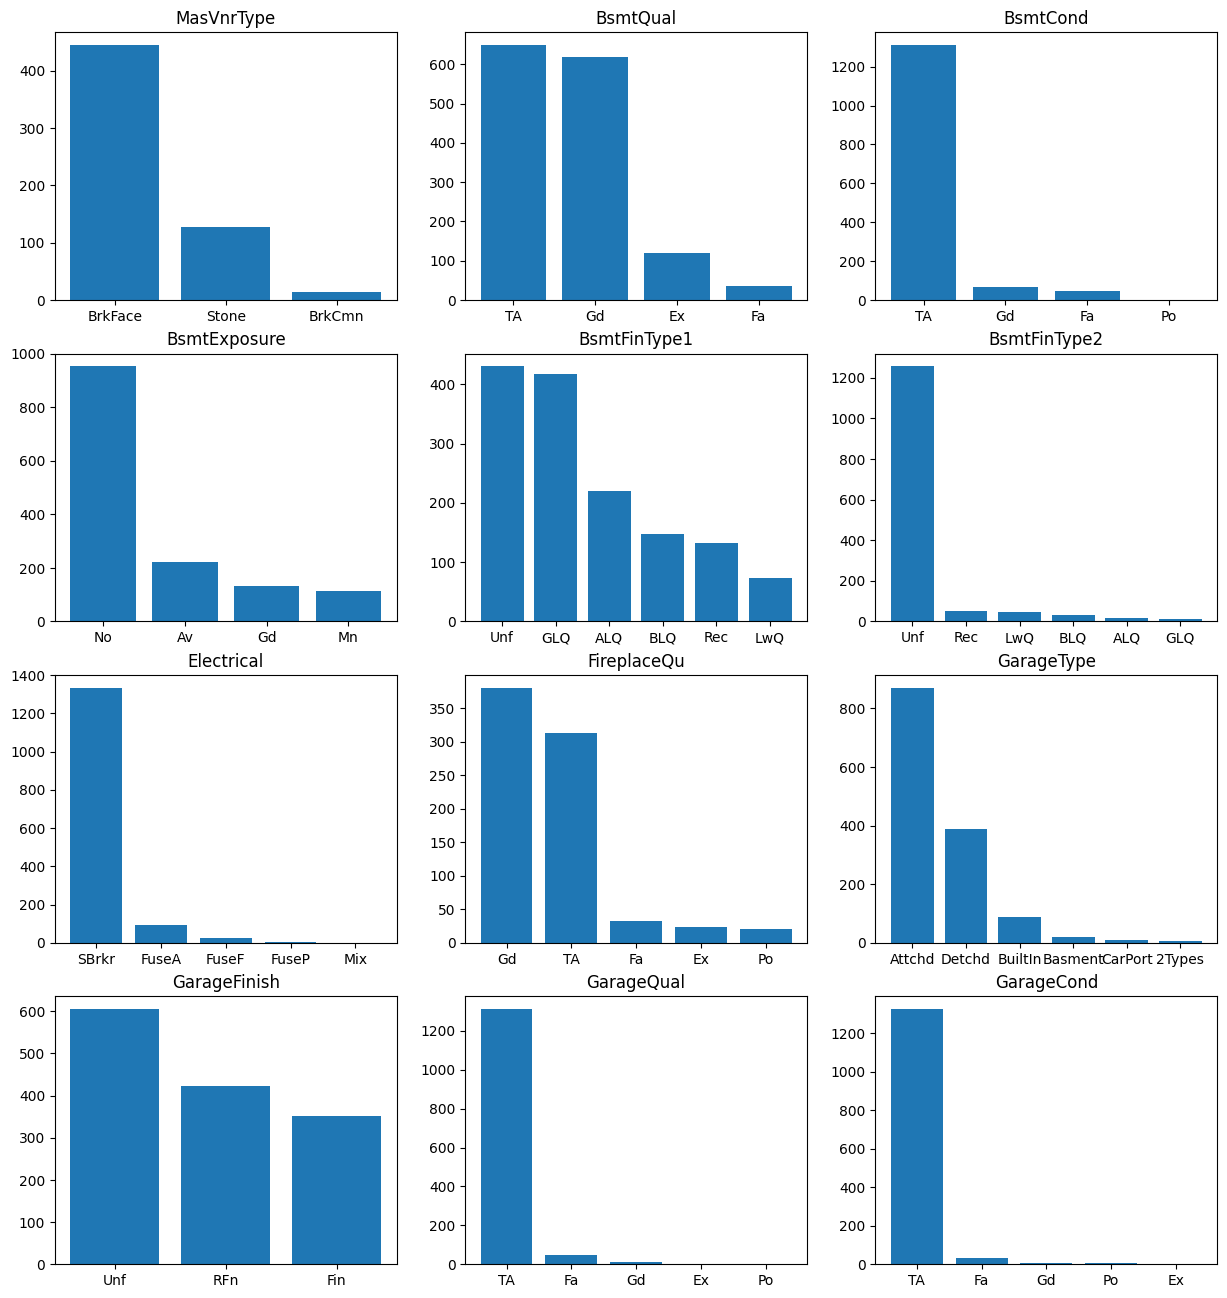

In [27]:
figs, axes = plt.subplots(4,3, figsize = (15,16))
#train['MasVnrType'].value_counts().to_frame()
for i, col in enumerate(missing_cat_cols):
    count_df = train[col].value_counts().reset_index()
    axes[i//3][i%3].bar(count_df[col],count_df['count'])
    axes[i//3][i%3].set_title(col)
plt.show()

> ### We will transform categorical features and numerical features using Pipeline and ColumnTransformer
    1. Make numerical_pipeline and categorical_pipeline 
    2. Transform columns with ColumnTransformer
    3. Turn the transformed X's type to numpy array type  

> 

In [30]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 

> ### As seen from the distribution of missing features, I decided to impute:
    - median for numerical features since the distributions are not normal
    - most_frequent value for categorical features since this is common choice

In [31]:
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', MinMaxScaler())
])
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('ohe', OneHotEncoder())
])

In [33]:
# Drop Id and SalePrice
num_cols = num_cols.drop(['Id', 'SalePrice'])

In [34]:
preprocessing_pipeline = ColumnTransformer([
    ('numerical', numeric_pipeline, num_cols),
    ('categorical', categorical_pipeline, cat_cols)
])

In [35]:
num_cols.shape, cat_cols.shape

((36,), (39,))

In [36]:
X = train[num_cols.tolist() + cat_cols.tolist()]
y = train['SalePrice']
X.shape, y.shape

((1460, 75), (1460,))

In [37]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


> ### Fit and transform X and change its type to numpy array

In [38]:
X_transformed= preprocessing_pipeline.fit_transform(X)

In [39]:
X_transformed = X_transformed.toarray()

# Build Neural Network model
In this notebook, i will build a simple neural network model using tensorflow. 
* The architecture of this model would be:
#### `input_layer -> hidden_layer(128 neurons) -> hidden_layer(64 neurons) -> hidden_layer(32 neurons) -> hidden_layer(16 neurons) -> hidden_layer(8 neurons) -> output_layer`
* The activation for each hidden layer and output layer is `RELU` 
* The loss function for my model is `Mean Absolute Error` (MAE) 
* I find the best learning rate for my model using `tf.keras.callbacks.LearningRateScheduler`


> ### Divide the train X,y into train and test set

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y, random_state = 42, test_size = 0.2)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 274), (292, 274), (1168,), (292,))

> ### Find the best learning rate for my model

In [42]:
tf.random.set_seed(42)

# Build the model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu')
])

scheduler = tf.keras.callbacks.LearningRateScheduler(lambda e: 1e-3 * 10**(e/20))

# Compile the model 
model.compile(loss = tf.keras.losses.MAE,
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['mae']
             )

# Fit the model 
history = model.fit(X_train, y_train, epochs = 300,callbacks = [scheduler])

Epoch 1/300
26/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 177634.0000 - mae: 177634.0000 

I0000 00:00:1710733502.292476      91 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 178342.4375 - mae: 178352.1719 - learning_rate: 0.0010
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 178266.8438 - mae: 178276.9219 - learning_rate: 0.0011
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 176022.7969 - mae: 176039.2656 - learning_rate: 0.0013
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 141587.6875 - mae: 141629.4375 - learning_rate: 0.0014
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49278.1211 - mae: 49277.7656 - learning_rate: 0.0016
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40144.0781 - mae: 40142.6680 - learning_rate: 0.0018
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34922.0391 - mae: 34922.0078 - learning_rate: 0.0020
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30898.8691 - mae: 30899.5508 - learning_rate: 0.0022
Epoch 9/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28061.4238 - mae: 28063.1777 - learning_rate: 0.

> ### Plot the ideal learning rate

Text(0.5, 1.0, 'finding the ideal learning rate')

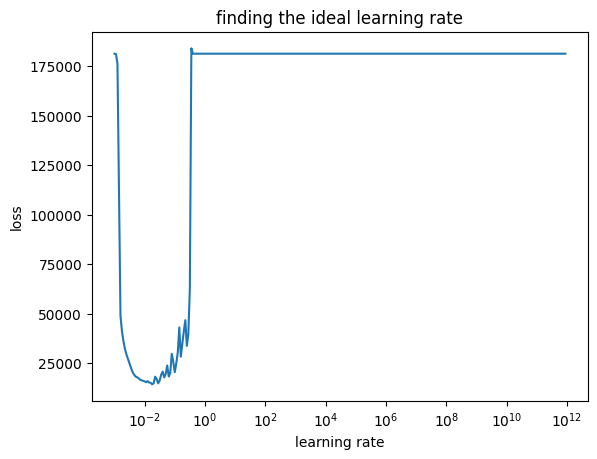

In [43]:
lrs = 1e-3 * (10**(tf.range(300)/20))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel("learning rate")
plt.ylabel('loss')
plt.title('finding the ideal learning rate')

=> ideal learning rate would be around 0.005

> ### Rerun the model with the ideal learning rate 

In [47]:
tf.random.set_seed(42)

# Build the model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu')
])

# Compile the model 
model.compile(loss = tf.keras.losses.MAE,
             optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005),
             metrics = ['mae']
             )

# Fit the model 
history = model.fit(X_train, y_train, epochs = 300)

Epoch 1/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 178341.6719 - mae: 178351.4062
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 178313.6875 - mae: 178323.4688
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 178087.3438 - mae: 178097.4062
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 176880.3281 - mae: 176891.3750
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 172299.8281 - mae: 172313.6875
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 158373.1719 - mae: 158393.8125
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 122681.0156 - mae: 122714.4922
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60583.0781 - mae: 60582.8633
Epoch 9/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45279.1523 - mae: 45276.5859
Epoch 10/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42723.4492 - mae: 42720.5664
Epoch 11/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40697.5742 - mae: 40694.7109
Epoch 12/300
37

> ### Evaluate on X_test, y_test

In [48]:
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 15954.2305 - mae: 16064.0830


[16604.28515625, 17208.474609375]

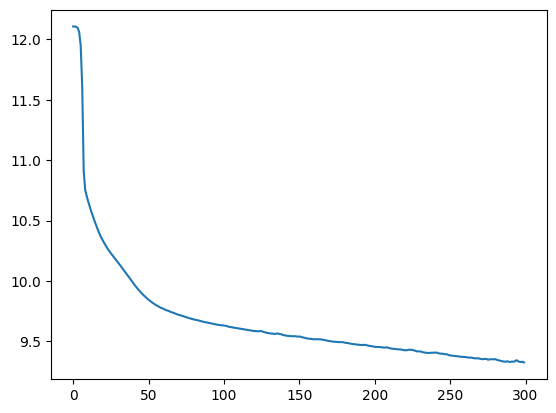

In [49]:
plt.plot(np.log(history.history['loss']))

# Prediction and Submission

In [50]:
X_test_final = test.drop(['Id'], axis=1)

In [52]:
# Transfom the test data with preprocessing pipeline
X_test_final_transformed = preprocessing_pipeline.transform(X_test_final).toarray()

In [53]:
X_test_final_transformed 

array([[0.        , 0.20205479, 0.04824604, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.20547945, 0.06060904, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.18150685, 0.05856645, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.4760274 , 0.08740564, ..., 0.        , 0.        ,
        0.        ],
       [0.38235294, 0.14041096, 0.04272593, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.18150685, 0.03892122, ..., 0.        , 1.        ,
        0.        ]])

In [54]:
prediction = model.predict(X_test_final_transformed)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [55]:
prediction.flatten()

array([125171.78, 152670.08, 178844.73, ..., 156808.56, 122046.17,
       200880.12], dtype=float32)

In [56]:
submission = pd.DataFrame({'Id':test['Id'], 'SalePrice':prediction.flatten()})

In [57]:
submission

,Id,SalePrice
0,1461,125171.781250
1,1462,152670.078125
2,1463,178844.734375
3,1464,187468.156250
4,1465,192550.468750
...,...,...
1454,2915,74660.796875
1455,2916,77232.929688
1456,2917,156808.562500
1457,2918,122046.171875


In [59]:
submission.to_csv('submission.csv', index = False)